In [1]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload 
import SQcircuit as sq
reload(sq_ext)

<module 'Modules.SQcircuit_extensions' from 'C:\\Users\\gabri\\PycharmProjects\\tunable-capacitive-coupling-flux-qubits\\Modules\\SQcircuit_extensions.py'>

<Figure size 640x480 with 0 Axes>

In [2]:
C, CJ, Csh, Lq, Lr, Δ, EJ = sq_ext.get_experimental_parameters('qubit_1', return_effective=False)
C_F_eff, C_R_eff = sq_ext.C_CJ_Csh_to_CF_CR_eff(C, CJ, Csh)
L_F_eff, L_R_eff, L_C_eff = sq_ext.Lq_Lr_to_LF_LR_LC_eff(Lq, Lr, Δ)

In [3]:
nmax_f = 50
n_eig = 40

φ_ext_vales_plot = [0.5, 0.55, 0.75]

φ_ext_values =np.concatenate(([0.5],  0.5  + np.geomspace(1e-5, 0.5, 200)))
φ_ext_indices = [np.where(np.abs(φ_ext_values-φ_ext) == np.abs(φ_ext_values-φ_ext).min())[0][0] for φ_ext in  φ_ext_vales_plot]

In [4]:
fluxonium = sq_ext.sq_fluxonium(EJ=EJ, C_F_eff=C_F_eff, L_F_eff =L_F_eff, Δ=Δ, nmax_f=nmax_f)
H0  = fluxonium.hamiltonian()
E0, ψ0 = sq_ext.diag(H0, n_eig, remove_ground=True, fix_phase=True)

In [5]:
E = np.zeros([len(φ_ext_values), n_eig])
ψ = np.zeros([len(φ_ext_values), nmax_f, n_eig], dtype='complex')
H = np.zeros([len(φ_ext_values), nmax_f, nmax_f], dtype='complex')

loop = fluxonium.loops[0]
for i, φ_ext  in enumerate(φ_ext_values):
    loop.set_flux(φ_ext)
    H[i] = fluxonium.hamiltonian()
    E[i] , ψ[i] = sq_ext.diag(H[i], n_eig, remove_ground=True, fix_phase=True)

In [6]:
overlap = np.zeros([len(φ_ext_values), n_eig, n_eig], dtype='complex')
H_in_ψ0 = np.zeros([len(φ_ext_values), n_eig, n_eig], dtype='complex') 
H_in_ψ02 = np.zeros([len(φ_ext_values), n_eig, n_eig], dtype='complex') 
for i in range(len(φ_ext_values)) :
    overlap[i] = ψ0.conj().T  @ ψ[i]
    H_in_ψ0[i] = overlap[i] @ np.diag(E[i]) @ overlap[i].conj().T
    H_in_ψ02[i] = ψ0.conj().T @ H[i].__array__() @ ψ0 / 2/ np.pi / 1e9

### Fluxonium eigensates expressed in the basis at frustration

C:\Users\gabri\miniconda3\envs\tunable-cc-fq\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


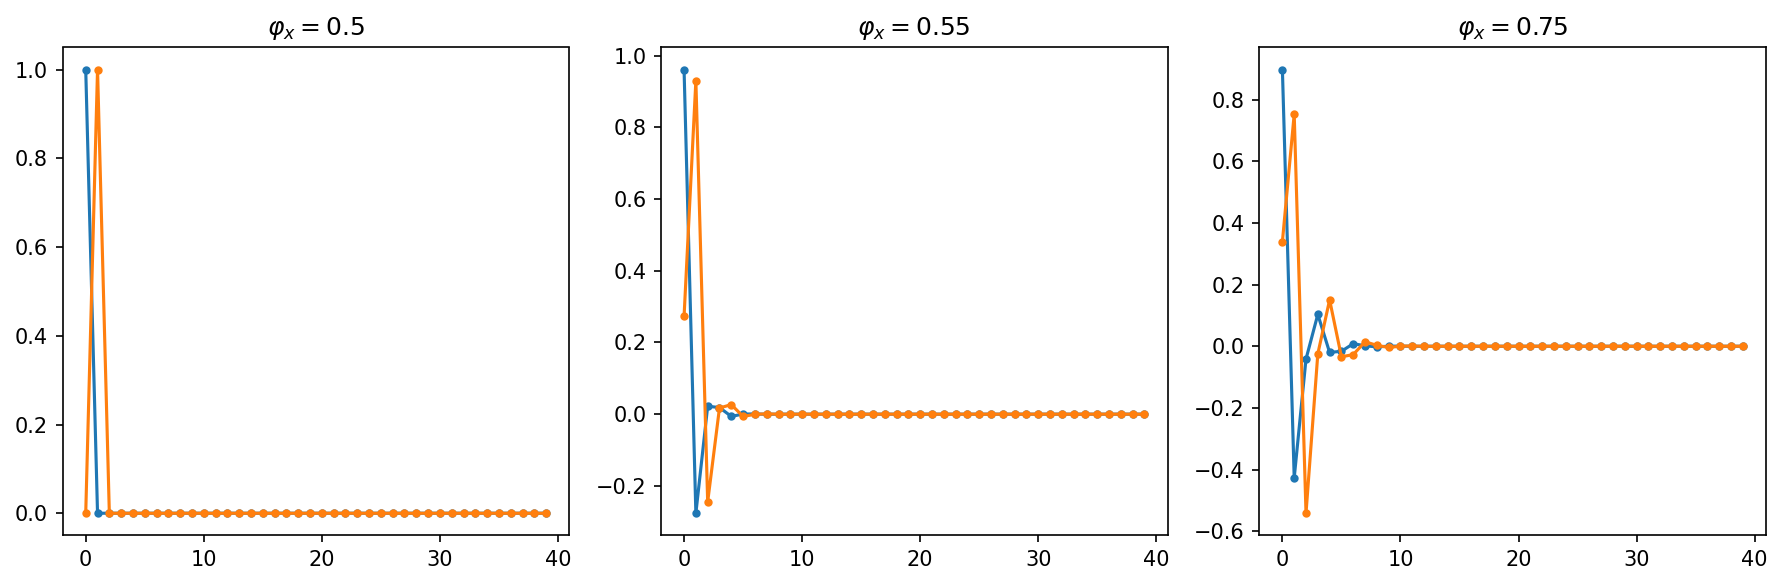

In [7]:

fig, axs = plt.subplots(ncols=3, figsize = [12, 4], dpi=150)
for ax, φ_ext_index in zip(axs, φ_ext_indices) :
    ax.plot(overlap[φ_ext_index,:,:2],'.-')
    ax.set_title(fr'$\varphi_x = {np.round(φ_ext_values[φ_ext_index],2)}$')

fig.tight_layout()

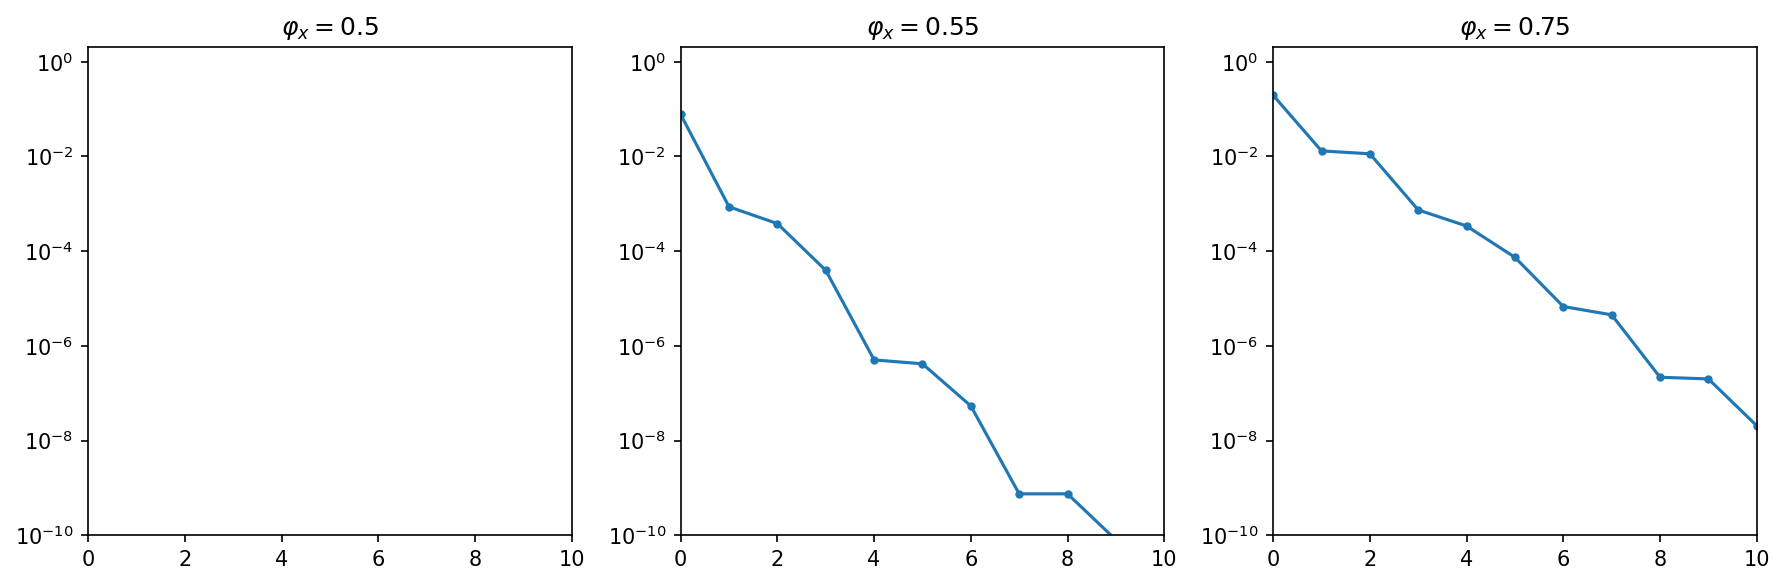

In [8]:
fig, axs = plt.subplots(ncols=3, figsize = [12, 4], dpi=150)

for ax, φ_ext_index in zip(axs, φ_ext_indices) :
    # ax.plot(np.abs(overlap[φ_ext_index,0,:]),'.-')
    ax.plot(1-np.cumsum(np.abs(overlap[φ_ext_index,:,0])**2),'.-')
    ax.set_yscale('log')
    ax.set_ylim([1e-10,2])
    ax.set_xlim([0,10])
    ax.set_title(fr'$\varphi_x = {np.round(φ_ext_values[φ_ext_index],2)}$')
    
fig.tight_layout()

In [59]:
np.sum(np.abs(overlap[-1,0,:10])**2)

0.9999999964184513

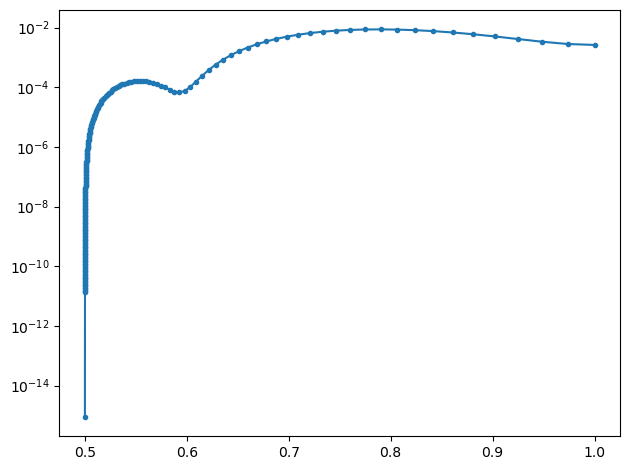

In [67]:
fig, ax = plt.subplots( dpi=100)

# ax.plot(φ_ext_values, 1-np.cumsum(np.abs(overlap[:,2,0])**2,0),'.-')
ax.plot(φ_ext_values, 1-np.sum(np.abs(overlap[:,0,:3])**2,1),'.-')
ax.set_yscale('log') 
# ax.set_ylim([1e-10,2])
    
fig.tight_layout()

In [13]:
loop.set_flux(0.5)
fluxonium.diag(5)
gx_vs_φ_ext, gz_vs_φ_ext = sq_ext.fluxonium_qubit_ops_vs_φ_ext(EJ, E0, fluxonium, φ_ext_values, return_full=True)
θ_vs_φ_ext = 2 *  gx_vs_φ_ext / (E0[1])


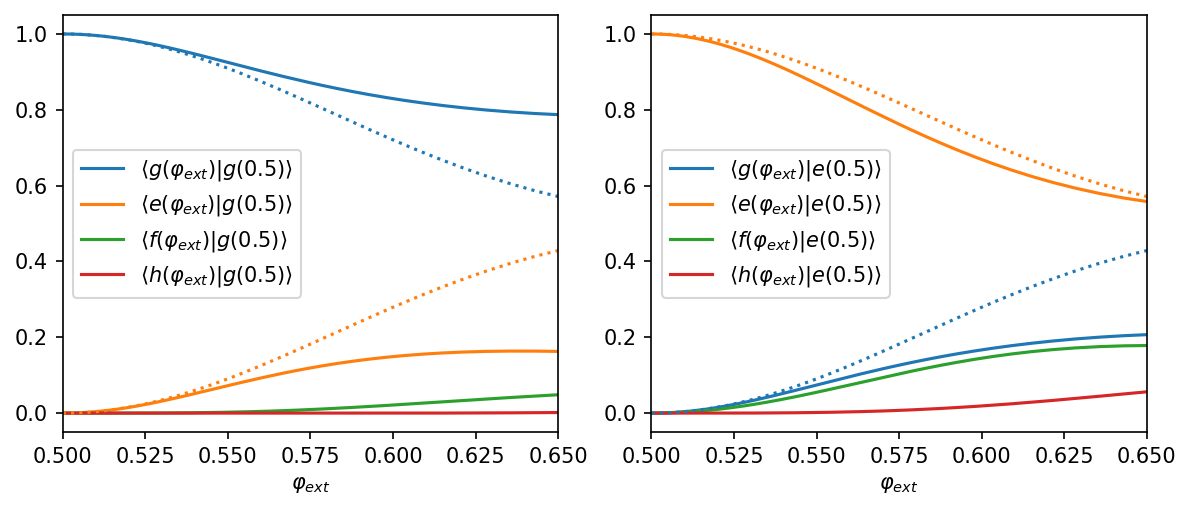

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=[8,3.5], dpi=150)
colors = figs.generate_colors_from_colormap(10,'tab10')
sublabel = ['g', 'e']

for i, ax in enumerate(axs):
    ax.plot(φ_ext_values, np.abs(overlap[:,i,0])**2,color=colors[0], label = r'$\langle g(\varphi_{ext})|' + rf'{sublabel[i]}(0.5)\rangle$')
    ax.plot(φ_ext_values, np.abs(overlap[:,i,1])**2,color=colors[1], label = r'$\langle e(\varphi_{ext})|' + rf'{sublabel[i]}(0.5)\rangle$')
    ax.plot(φ_ext_values, np.abs(overlap[:,i,2])**2,color=colors[2], label = r'$\langle f(\varphi_{ext})|' + rf'{sublabel[i]}(0.5)\rangle$')
    ax.plot(φ_ext_values, np.abs(overlap[:,i,3])**2,color=colors[3], label = r'$\langle h(\varphi_{ext})|' + rf'{sublabel[i]}(0.5)\rangle$')
    # ax.plot(φ_ext_values, np.sum(np.abs(overlap[:,i,3:])**2,1),color=colors[4], label = r'$\langle h(\varphi_{ext})|' + rf'{sublabel[i]}(0.5)\rangle$')
    ax.set_xlim([0.5,0.65])
    ax.legend()
    ax.set_xlabel(r'$\varphi_{ext}$')
 
axs[0].plot(φ_ext_values,np.abs(np.cos(θ_vs_φ_ext/2))**2,':', color=colors[0])
axs[0].plot(φ_ext_values,np.abs(np.sin(θ_vs_φ_ext/2))**2,':', color=colors[1])

axs[1].plot(φ_ext_values,np.abs(-np.sin(θ_vs_φ_ext/2))**2,':', color=colors[0])
axs[1].plot(φ_ext_values,np.abs( np.cos(θ_vs_φ_ext/2))**2,':', color=colors[1])


fig.tight_layout()

# figs.export('wavefunction_overlap_vs_phi_ext.pdf',fig)

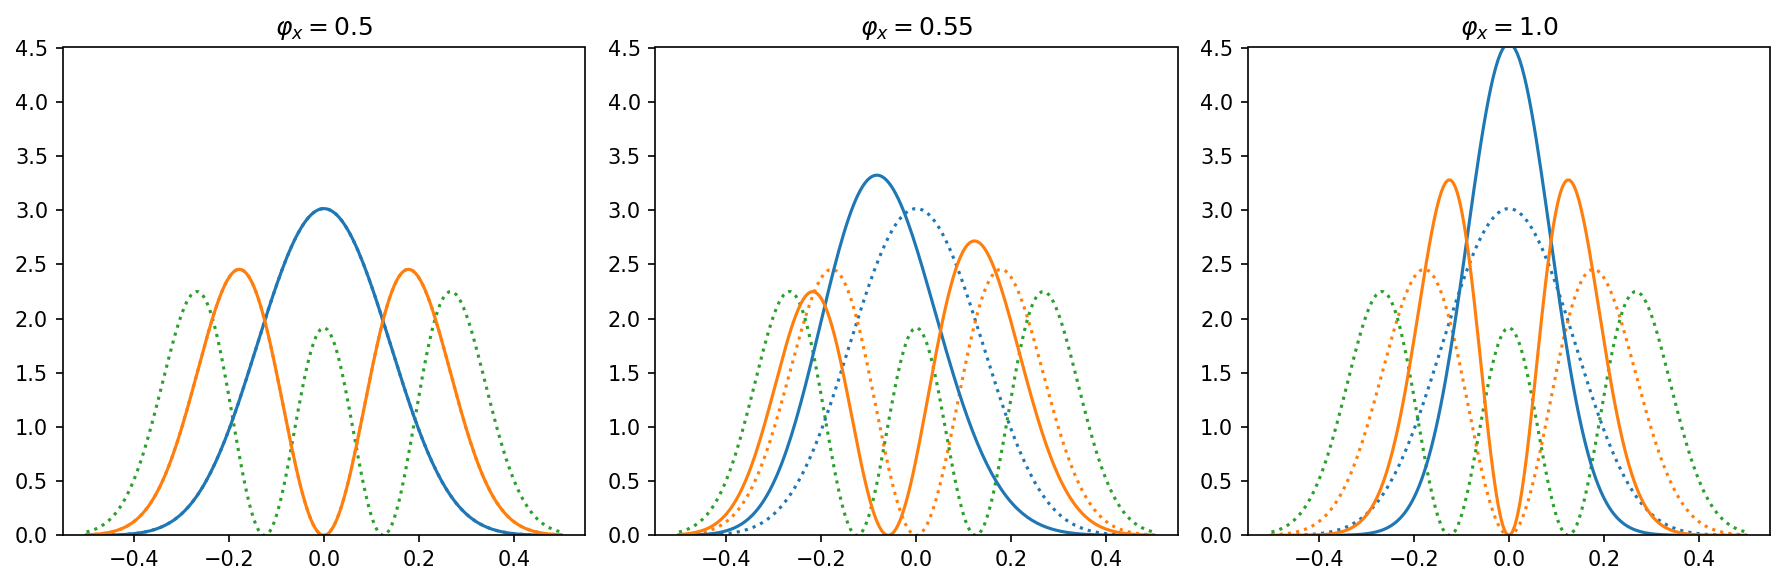

In [337]:
grid = np.linspace(-np.pi,np.pi,200)/2/np.pi
# φ_ext_indices[-1] = -1
colors = figs.generate_colors_from_colormap(10,'tab10')

fig, axs = plt.subplots(ncols=3, figsize=[12,4], dpi=150)

for i, (ax, φ_ext_index) in enumerate(zip(axs,φ_ext_indices)):
    # loop.set_flux(φ_ext_values[φ_ext_index])
    fluxonium = sq_ext.sq_fluxonium(EJ=EJ, C_F_eff=C_F_eff, L_F_eff =L_F_eff, Δ=Δ, nmax_f=nmax_f, φ_ext= φ_ext_values[φ_ext_index])
    fluxonium.diag(3)
    g = np.abs(fluxonium.eig_phase_coord(k=0,grid=[grid]))**2
    e = np.abs(fluxonium.eig_phase_coord(k=1,grid=[grid]))**2
    f = np.abs(fluxonium.eig_phase_coord(k=2,grid=[grid]))**2
    if i==0:
        g0 = g
        e0 = e   
        f0 = f   
    ax.plot(grid,g0,':', color=colors[0])
    ax.plot(grid,e0,':', color=colors[1])
    ax.plot(grid,f0,':', color=colors[2])  
    ax.plot(grid,g, color=colors[0])
    ax.plot(grid,e, color=colors[1])
    # ax.plot(grid,f, color=colors[2])
    
    ax.set_title(fr'$\varphi_x = {np.round(φ_ext_values[φ_ext_index],2)}$')
    ax.set_ylim([0,4.5])
fig.tight_layout()

 ### Fluxonium hamiltonian expressed in the basis at frustration

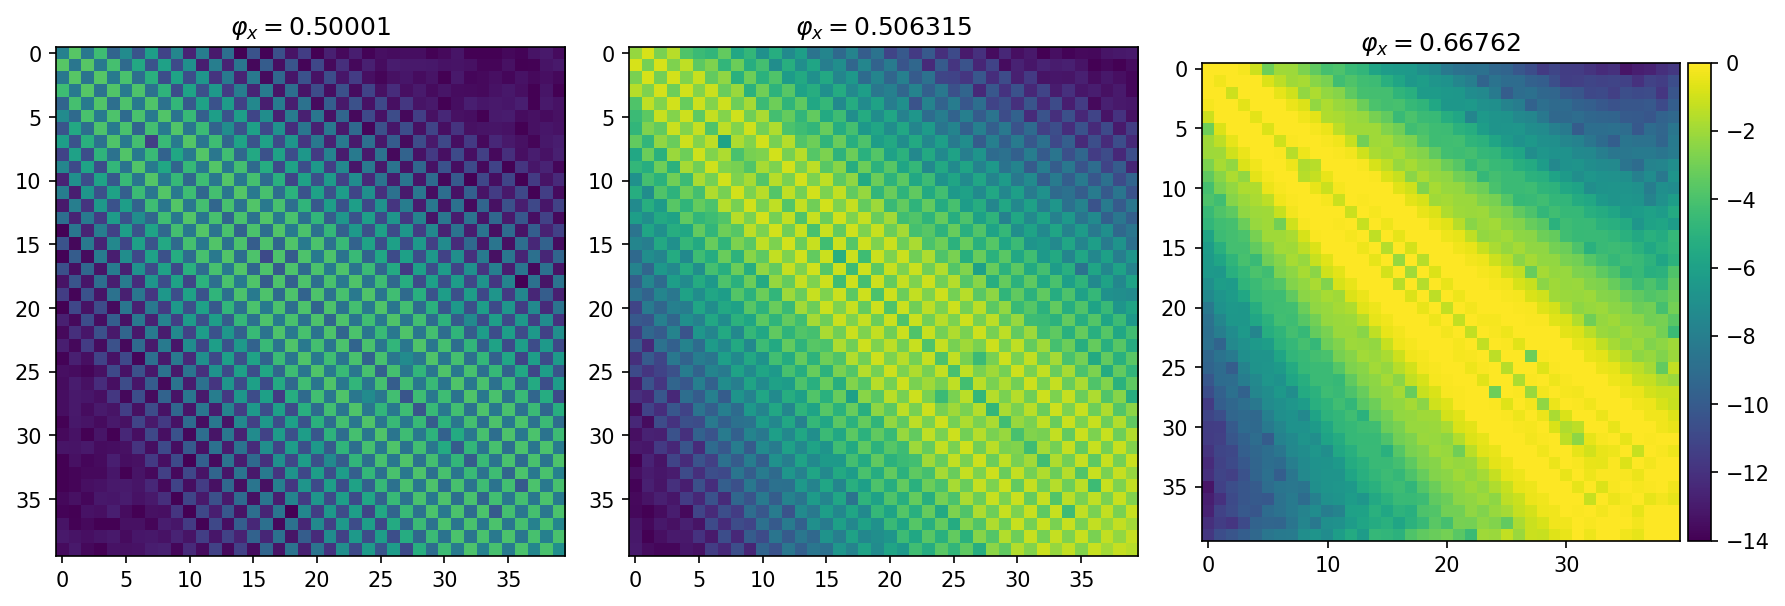

In [286]:
fig, axs = plt.subplots(ncols=3, figsize = [12, 4], dpi=150)
ticks=np.arange(-10,0)
for ax, φ_ext_index in zip(axs, φ_ext_indices) :
    c = ax.imshow(np.log10(np.abs(H_in_ψ0[φ_ext_index]-np.diag(E[φ_ext_index]))),vmin=-14, vmax=0)
    ax.set_title(fr'$\varphi_x = {np.round(φ_ext_values[φ_ext_index],2)}$')
    
figs.colorbar(c)  
fig.tight_layout()

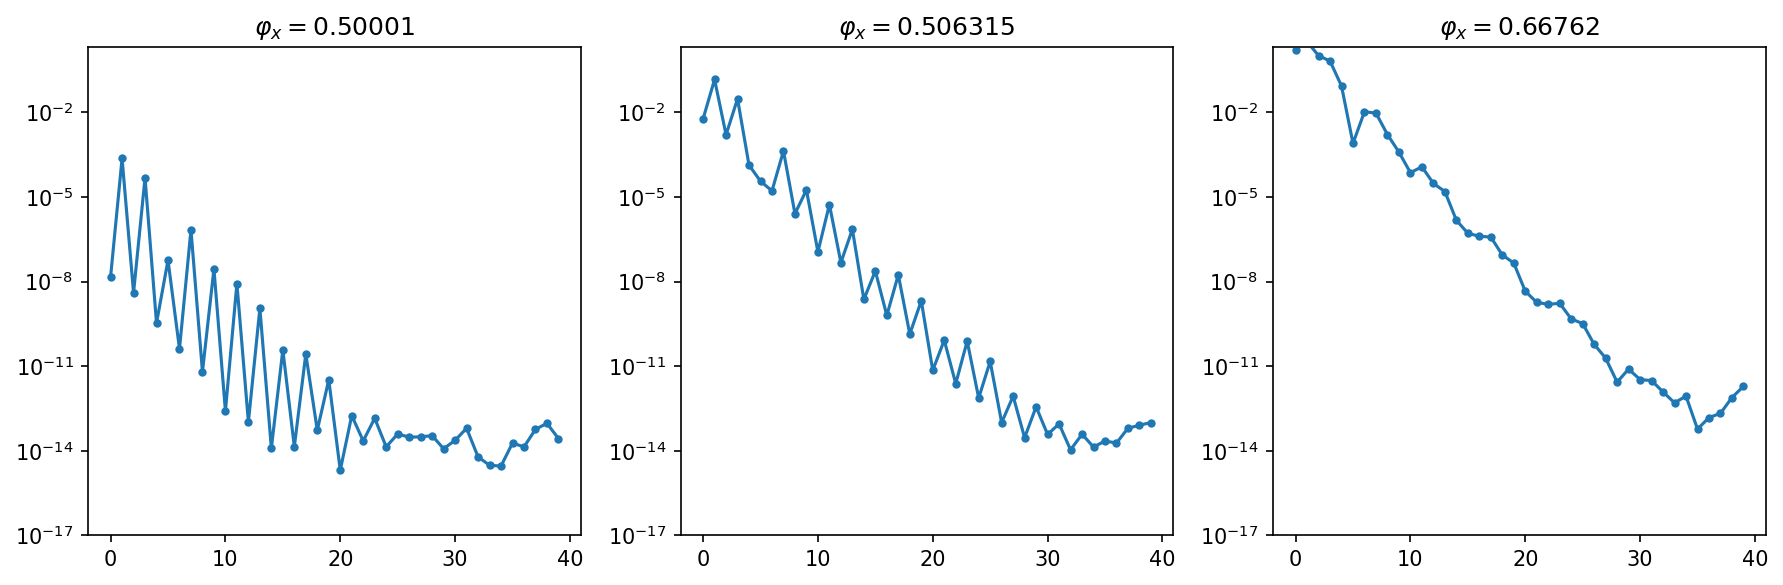

In [287]:
fig, axs = plt.subplots(ncols=3, figsize = [12, 4], dpi=150)

for ax, φ_ext_index in zip(axs, φ_ext_indices) :
    ax.plot(np.abs(H_in_ψ0[φ_ext_index,:,0]),'.-')
    ax.set_yscale('log')
    ax.set_ylim([1e-17,2])
    ax.set_title(fr'$\varphi_x = {np.round(φ_ext_values[φ_ext_index],2)}$')
    
fig.tight_layout()

### Error in the spectrum of the fluxonium in the basis at frustration (with progressively cropped basis)

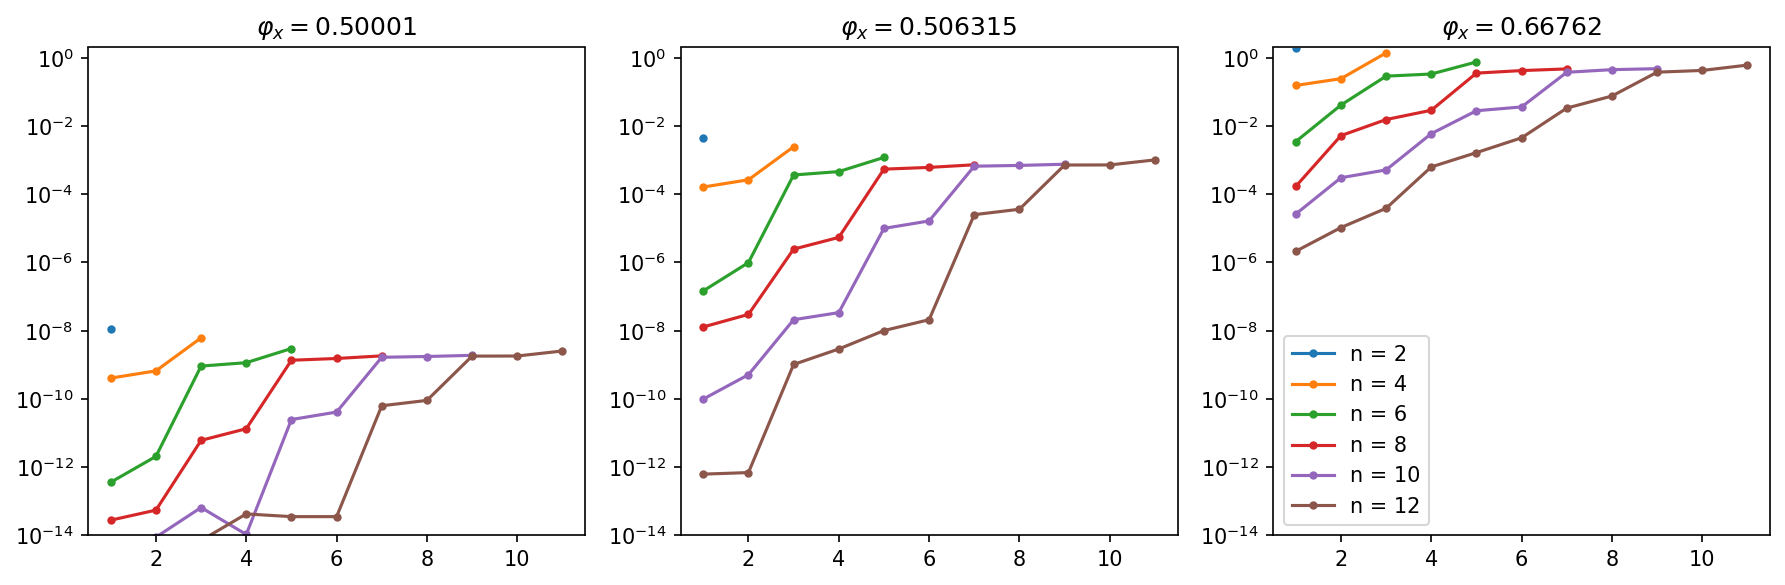

In [319]:
fig, axs = plt.subplots(ncols=3, figsize = [12, 4], dpi=150)

n_basis = np.arange(2, 14, 2)
error_vs_φ_ext = []
for ax, φ_ext_index in zip(axs, φ_ext_indices) :
    error=[]
    for n in n_basis:
        E_in_ψ0 = sq_ext.diag(H_in_ψ0[φ_ext_index,:n,:n],n,solver='numpy', out=None,remove_ground=True)[0]
        error.append(np.abs(E_in_ψ0[1:]-E[φ_ext_index,1:n]))
        ax.plot(np.arange(1,n), np.abs(E_in_ψ0[1:]-E[φ_ext_index,1:n]),'.-', label=f'n = {n}')
        
        ax.set_yscale('log')
        ax.set_ylim([1e-14,2])
        ax.set_title(fr'$\varphi_x = {np.round(φ_ext_values[φ_ext_index],2)}$')
    error_vs_φ_ext.append(error) 
ax.legend()
fig.tight_layout()

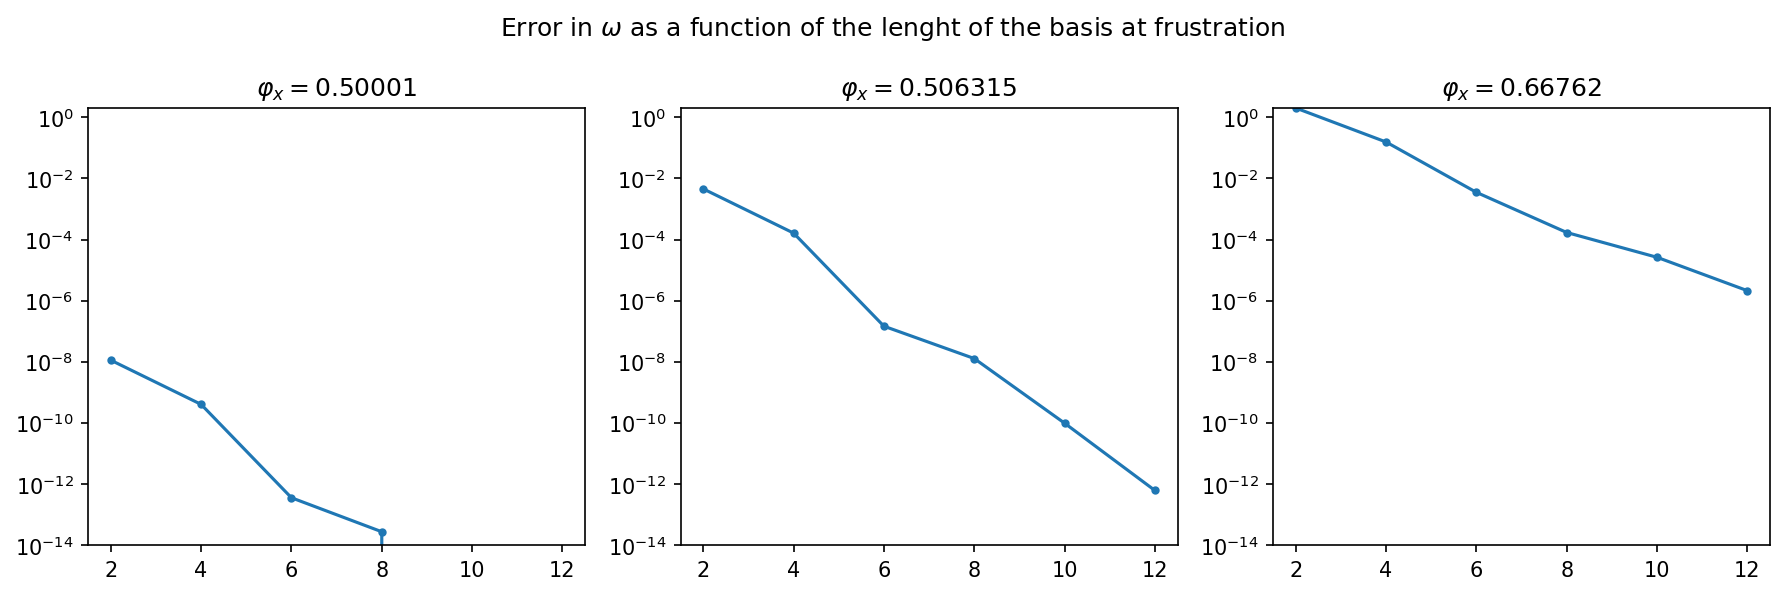

In [320]:
fig, axs = plt.subplots(ncols=3, figsize = [12, 4], dpi=150)

for  ax, φ_ext_index, error  in zip(axs, φ_ext_indices, error_vs_φ_ext):
    error_ω = [error_i[0] for error_i in error]
    ax.plot(n_basis,error_ω, '.-')
    ax.set_title(fr'$\varphi_x = {np.round(φ_ext_values[φ_ext_index],2)}$')
    ax.set_yscale('log')
    ax.set_ylim([1e-14,2])

fig.suptitle('Error in $\omega$ as a function of the lenght of the basis at frustration')
fig.tight_layout()